In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
df = pd.read_csv('Social_Network_Ads.csv')

In [8]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
df = df.iloc[:,2:]

In [14]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [18]:
df.shape

(400, 3)

In [35]:
x = df.drop("Purchased",axis="columns")
y = df["Purchased"]

In [41]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [43]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

# Train Test Split

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [49]:
x_train.shape,x_test.shape

((320, 2), (80, 2))

# Standard scaler

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [54]:
x_train.head()

,Age,EstimatedSalary
96,35,25000
368,38,71000
318,45,32000
192,29,43000
326,41,72000


In [58]:
scaler.mean_

array([3.7571875e+01, 6.9406250e+04])

In [62]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [66]:
x_train_scaled.head()

,Age,EstimatedSalary
0,-0.241155,-1.295975
1,0.040144,0.046513
2,0.696507,-1.091683
3,-0.803752,-0.770654
4,0.321442,0.075697


In [76]:
np.round(x_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,320.0,320.0
mean,0.0,0.0
std,1.0,1.0
min,-1.8,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.1,2.4


# Effects of Scaling 

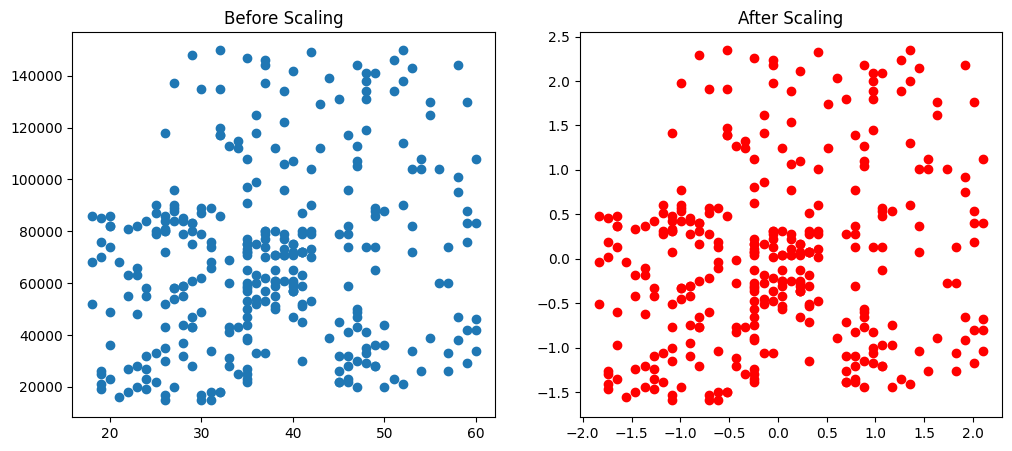

In [81]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

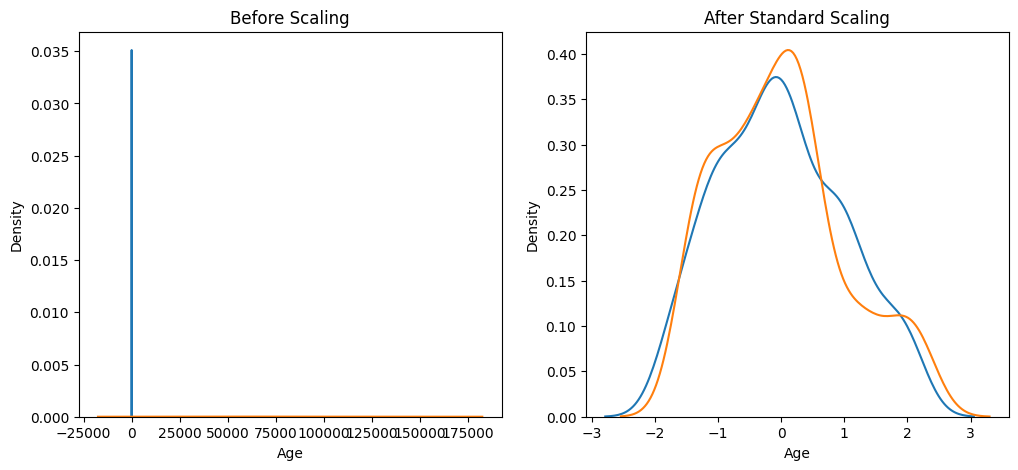

In [85]:
ig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Why Scaling is important ?

In [88]:
from sklearn.linear_model import LogisticRegression

In [90]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [94]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [96]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [100]:
from sklearn.metrics import accuracy_score

In [102]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.8375
Scaled 0.8375


In [104]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [110]:
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [112]:
y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(x_test_scaled)

In [116]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.8875
Scaled 0.9


# Effect Outlier

In [125]:
new_data = pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})

In [141]:
df1 = pd.concat([df, new_data], ignore_index=True)

In [143]:
df1

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
401,90,250000,1
402,95,350000,1
403,5,1000,0
404,90,250000,1


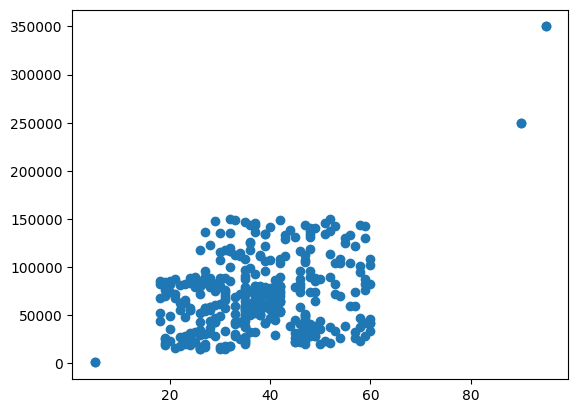

In [145]:
plt.scatter(df1['Age'], df1['EstimatedSalary'])

In [153]:
x = df1.drop("Purchased",axis="columns")
y = df1["Purchased"]

In [155]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [157]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [159]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [163]:
x_train_scaled.head()

,Age,EstimatedSalary
0,0.804574,-0.552204
1,-1.023857,-1.460140
2,0.282165,-0.022574
3,0.978710,0.330513
4,-0.066107,-0.022574


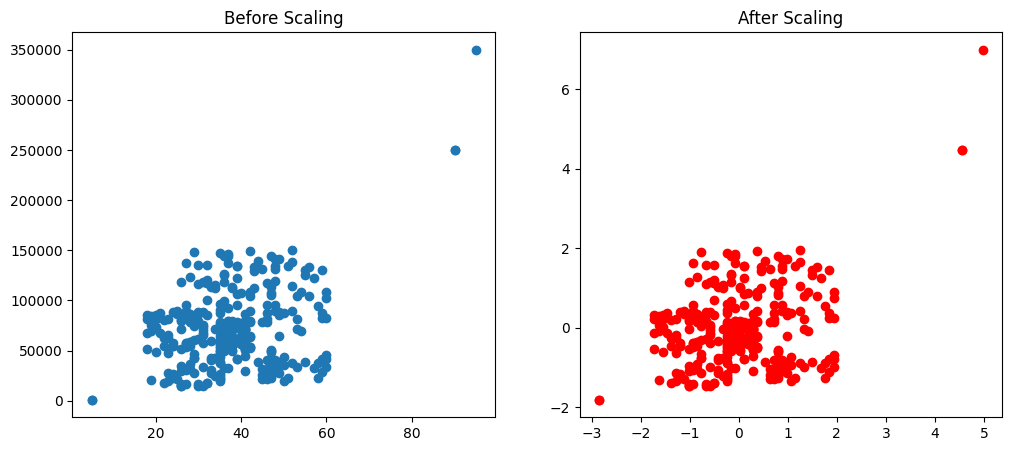

In [161]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()